In [230]:
# import all the required libraries
import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd

link = "https://www.timesnownews.com/"
page = requests.get(link)

soup = bs(page.content,"html.parser")

news = soup.find_all('a',class_='_3UYZ',href=True)
#print(news)
category=[]
newsTitleProper=[]
newsArticle=[]
for i in news[2:3]:
  news = []
  newsurl=i['href']
  page1 = bs((requests.get(newsurl)).content,"html.parser")
  Title = page1.find_all('a',class_='undefined',href=True)
  for j in Title[:1]:
    categorynews1=page1.find('h1')
    categorynews=categorynews1.text
    category.append(categorynews)
    newsurl1=j['href']
    page2 = bs((requests.get(newsurl1)).content,"html.parser")
    newsTitle = page2.find_all('h1')
    newsarticle= page2.find_all('div',class_='_1884')
    news11=""
    for l in newsTitle:
      newstitle=l.text
      newsTitleProper.append(l.text)
    for k in newsarticle:
      news10=k.text
      if news10=="":
        pass
      else:
        news11=news11+news10
    newsArticle.append(news11)

data={"category": category,"Title":newsTitleProper, "Article":newsArticle}

df=pd.DataFrame(data)
df

In [232]:
# Data Cleaning in the file News.csv
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  456 non-null    object
 1   Title     456 non-null    object
 2   Article   396 non-null    object
dtypes: object(3)
memory usage: 10.8+ KB


,category,Title,Article
0,Latest News,mAadhaar App Tips: How To Locate The Nearest A...,"mAadhaar application, launched by the Unique I..."
1,Latest News,Bigg Boss 17's Sana Raees Khan's Stylist Issue...,After her eviction from the Bigg Boss 17 house...
2,Latest News,India vs South Africa: Gerald Coetzee Ruled Ou...,South Africa pacer Gerald Coetzee has been rul...
3,Latest News,Malaika Arora Opens Up On Getting Married For ...,Days after Arbaaz Khan and Sshura Khan's intim...
4,Latest News,Jeremy Renner Returns To Film Set One Year Aft...,"Actor Jeremy Renner, who suffered blunt chest ..."


In [233]:
df['category'].value_counts()
df.drop (df.loc [df ['category'] == 'Latest News'].index, inplace=True)
df.drop (df.loc [df ['category'] == 'Viral'].index, inplace=True)
df

,category,Title,Article
22,entertainment news,"Varun Dhawan, Karan Johar's Dulhania 3 To Go O...",Bollywood heartthrob Varun Dhawan is all set t...
23,entertainment news,"Will Shah Rukh Khan, Ram Charan Headline Dhoom...",Dhoom 4: Yash Raj Films' Dhoom is unarguably o...
24,entertainment news,Rajkumar Hirani Finally Opens Up On Making Mun...,It was 2003 when filmmaker Rajkumar Hirani int...
25,entertainment news,Berlin Review: Pedro Alonso's Breakout Charact...,NaN
26,entertainment news,Malaika Arora Opens Up On Getting Married For ...,Days after Arbaaz Khan and Sshura Khan's intim...
...,...,...,...
451,Lifestyle,EXCLUSIVE! Influencer Zervaan Bunshah Talks Ab...,The internet is on fire and only Zervaan Bunsh...
452,Lifestyle,Ringing In 2024: Best Drinking Game To Play O...,We can see you are all set to usher in the New...
453,Lifestyle,Sarah Ferguson Gives Update On Late Queen's Co...,Just a few months after reassuring fans that t...
454,Lifestyle,Princess Diana’s Dress Fetches Record Breaking...,The one name that has stood the test of time a...


In [234]:
# Remove Null Positions
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 22 to 455
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  355 non-null    object
 1   Title     355 non-null    object
 2   Article   355 non-null    object
dtypes: object(3)
memory usage: 11.1+ KB


In [235]:
# Removing duplicates
df = df.drop_duplicates(subset='Article', keep='first', ignore_index= True)
df.info()

# Proecessing the data to get in proper format
import re
df['Article'].apply(lambda x : re.sub("â€˜", "'", x)  )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  282 non-null    object
 1   Title     282 non-null    object
 2   Article   282 non-null    object
dtypes: object(3)
memory usage: 6.7+ KB


0      Bollywood heartthrob Varun Dhawan is all set t...
1      Dhoom 4: Yash Raj Films' Dhoom is unarguably o...
2      It was 2003 when filmmaker Rajkumar Hirani int...
3      Days after Arbaaz Khan and Sshura Khan's intim...
4      Actor Jeremy Renner, who suffered blunt chest ...
                             ...                        
277    The festive season is all about joy, celebrati...
278    We can see you are all set to usher in the New...
279    Just a few months after reassuring fans that t...
280    The one name that has stood the test of time a...
281    Veteran Bollywood actor Jackie Shroff was name...
Name: Article, Length: 282, dtype: object

In [236]:
df['Article'] = df['Article'].str.lower()
df['Title'] = df['Title'].str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  282 non-null    object
 1   Title     282 non-null    object
 2   Article   282 non-null    object
dtypes: object(3)
memory usage: 6.7+ KB


<ipython-input-236-5235320e83a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Article'] = df['Article'].str.lower()
<ipython-input-236-5235320e83a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = df['Title'].str.lower()


In [237]:
# Remove Punctuation Marks
import string

exclude = string.punctuation

def remove_punc1(text):
  return text.translate(str.maketrans('','',exclude))

df['Article'] = df['Article'].apply(remove_punc1)
df['Title'] = df['Title'].apply(remove_punc1)
df.head(10)


<ipython-input-237-8e651343dd69>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Article'] = df['Article'].apply(remove_punc1)
<ipython-input-237-8e651343dd69>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = df['Title'].apply(remove_punc1)


,category,Title,Article
0,entertainment news,varun dhawan karan johars dulhania 3 to go on ...,bollywood heartthrob varun dhawan is all set t...
1,entertainment news,will shah rukh khan ram charan headline dhoom ...,dhoom 4 yash raj films dhoom is unarguably one...
2,entertainment news,rajkumar hirani finally opens up on making mun...,it was 2003 when filmmaker rajkumar hirani int...
3,entertainment news,malaika arora opens up on getting married for ...,days after arbaaz khan and sshura khans intima...
4,entertainment news,jeremy renner returns to film set one year aft...,actor jeremy renner who suffered blunt chest t...
5,entertainment news,kalki 2898 ad trailer release date out nag ash...,fans are eagerly looking forward to prabhas an...
6,entertainment news,upcoming tamil movies in january 2024 captain ...,the month of january brings us new hope new re...
7,entertainment news,bollywood on ott in 2023 no great shakes unles...,filmistan’s major stars were seen gravitating ...
8,entertainment news,newlyweds arbaaz khan shhura khan all smiles a...,bollywood actorproducer arbaaz khan tied the k...
9,entertainment news,dunki box office collection day 9 shah rukh kh...,badshah of bollywood shah rukh khan returned t...


In [238]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
# Tokenize words
from nltk import word_tokenize

df['Article'] = df['Article'].apply(lambda x : word_tokenize(x))
df['Title'] = df['Title'].apply(lambda x : word_tokenize(x))
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-238-091824dc9275>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Article'] = df['Article'].apply(lambda x : word_tokenize(x))
<ipython-input-238-091824dc9275>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = df['Title'].apply(lambda x : word_token

,category,Title,Article
0,entertainment news,"[varun, dhawan, karan, johars, dulhania, 3, to...","[bollywood, heartthrob, varun, dhawan, is, all..."
1,entertainment news,"[will, shah, rukh, khan, ram, charan, headline...","[dhoom, 4, yash, raj, films, dhoom, is, unargu..."
2,entertainment news,"[rajkumar, hirani, finally, opens, up, on, mak...","[it, was, 2003, when, filmmaker, rajkumar, hir..."
3,entertainment news,"[malaika, arora, opens, up, on, getting, marri...","[days, after, arbaaz, khan, and, sshura, khans..."
4,entertainment news,"[jeremy, renner, returns, to, film, set, one, ...","[actor, jeremy, renner, who, suffered, blunt, ..."
...,...,...,...
277,Lifestyle,"[6, feng, shui, christmas, decor, ideas, to, e...","[the, festive, season, is, all, about, joy, ce..."
278,Lifestyle,"[ringing, in, 2024, best, drinking, game, to, ...","[we, can, see, you, are, all, set, to, usher, ..."
279,Lifestyle,"[sarah, ferguson, gives, update, on, late, que...","[just, a, few, months, after, reassuring, fans..."
280,Lifestyle,"[princess, diana, ’, s, dress, fetches, record...","[the, one, name, that, has, stood, the, test, ..."


In [239]:
# Remove stop words
from nltk.corpus import stopwords

def remove_stopwords(a):
  for word in a:
    if word in stopwords.words('english'):
      a.remove(word)
    else:
      continue

  return a


df['Article'] = df['Article'].apply(remove_stopwords)
df['Title'] = df['Title'].apply(remove_stopwords)
df

<ipython-input-239-7dfb68c1aeb8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Article'] = df['Article'].apply(remove_stopwords)
<ipython-input-239-7dfb68c1aeb8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = df['Title'].apply(remove_stopwords)


,category,Title,Article
0,entertainment news,"[varun, dhawan, karan, johars, dulhania, 3, go...","[bollywood, heartthrob, varun, dhawan, all, se..."
1,entertainment news,"[shah, rukh, khan, ram, charan, headline, dhoo...","[dhoom, 4, yash, raj, films, dhoom, unarguably..."
2,entertainment news,"[rajkumar, hirani, finally, opens, on, making,...","[was, 2003, filmmaker, rajkumar, hirani, intro..."
3,entertainment news,"[malaika, arora, opens, on, getting, married, ...","[days, arbaaz, khan, sshura, khans, intimate, ..."
4,entertainment news,"[jeremy, renner, returns, film, set, one, year...","[actor, jeremy, renner, suffered, blunt, chest..."
...,...,...,...
277,Lifestyle,"[6, feng, shui, christmas, decor, ideas, eleva...","[festive, season, all, joy, celebrations, crea..."
278,Lifestyle,"[ringing, 2024, best, drinking, game, play, yo...","[see, set, usher, new, year, joy, laughter, dr..."
279,Lifestyle,"[sarah, ferguson, gives, update, late, queens,...","[months, reassuring, fans, late, queens, corgi..."
280,Lifestyle,"[princess, diana, ’, dress, fetches, record, b...","[one, name, stood, test, time, stayed, relevan..."


In [240]:

def stringconverter(list):
  str=''
  for i in list:
    str=str+" "+i

  return str

df['Title']=df['Title'].apply(stringconverter)
df['Article']=df['Article'].apply(stringconverter)

<ipython-input-240-30d95aee9000>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title']=df['Title'].apply(stringconverter)
<ipython-input-240-30d95aee9000>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Article']=df['Article'].apply(stringconverter)


In [241]:
df

,category,Title,Article
0,entertainment news,varun dhawan karan johars dulhania 3 go floor...,bollywood heartthrob varun dhawan all set don...
1,entertainment news,shah rukh khan ram charan headline dhoom 4 find,dhoom 4 yash raj films dhoom unarguably one b...
2,entertainment news,rajkumar hirani finally opens on making munna...,was 2003 filmmaker rajkumar hirani introduced...
3,entertainment news,malaika arora opens on getting married 2nd ti...,days arbaaz khan sshura khans intimate weddin...
4,entertainment news,jeremy renner returns film set one year snowp...,actor jeremy renner suffered blunt chest trau...
...,...,...,...
277,Lifestyle,6 feng shui christmas decor ideas elevate fes...,festive season all joy celebrations creating ...
278,Lifestyle,ringing 2024 best drinking game play your new...,see set usher new year joy laughter drinks st...
279,Lifestyle,sarah ferguson gives update late queens corgi...,months reassuring fans late queens corgis thr...
280,Lifestyle,princess diana ’ dress fetches record breakin...,one name stood test time stayed relevant ever...


Training Data Shape: (197,)
Testing Data Shape: (85,)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


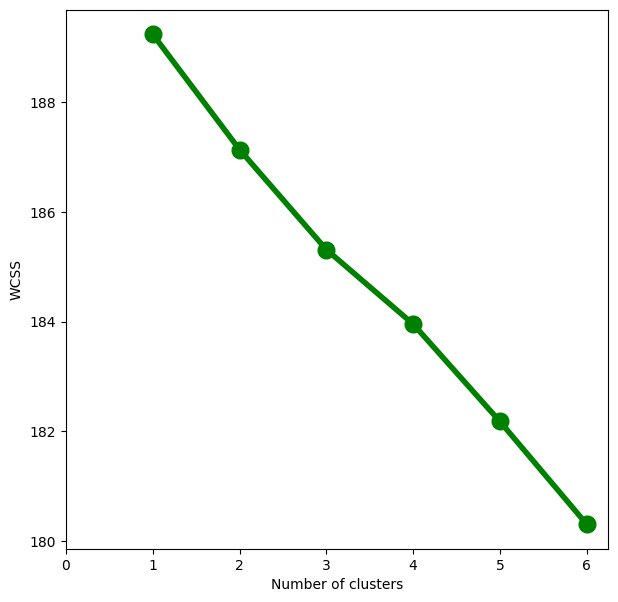

Testing Data Shape: (85, 13322)
Testing Data Shape: (85,)


<197x13322 sparse matrix of type '<class 'numpy.float64'>'
	with 35961 stored elements in Compressed Sparse Row format>

In [263]:
X = df['Title'] + df['Article']
y = df['category']



# Split the data into 70-30 i.e. test size of 30% to check the accuracy of the training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=77)

#Let's check the shape of the splitted data
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")
# import required module
from sklearn.feature_extraction.text import TfidfVectorizer
# create object
tfidf = TfidfVectorizer()
tfidf.fit(X_train)
X_train = tfidf.transform(X_train)
#X_train_CV = tfidf.fit_transform(X_train)
X_train
X_test = tfidf.transform(X_test)
from sklearn.cluster import KMeans

WCSS = []
for i in range(1,7):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(X_train)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,7),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(7))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

kmeans = KMeans(n_clusters=6).fit(X_train)
y_clusters = model.fit_predict(X_test)
y_clusters
print(f"Testing Data Shape: {X_test.shape}")
print(f"Testing Data Shape: {y_clusters.shape}")
X_test
X_train

In [289]:
X_test

<85x13322 sparse matrix of type '<class 'numpy.float64'>'
	with 12034 stored elements in Compressed Sparse Row format>

In [255]:
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [265]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC()
SVM.fit(X_train,y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_test)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score ->  80.0





  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.229.108.104:8501

  Stopping...
^C


In [278]:
!pip install -q streamlit

In [298]:
import streamlit as st

#Give the input Article to know the category
article = st.text_input('Paste Aricle')



Paste AricleA clash broke out between cops and truck drivers protesting the new hit-and-run law in Uttar Pradesh's Mainpuri on Tuesday afternoon. A video posted by news agency ANI shows truck drivers pelting stones at police personnel. Truck drivers across India have been protesting the new law in hit-and-run cases as part of the Bharatiya Nyaya Sanhita and have called for a three-day chakka jam. Since Monday, when the strike began, reports of violence have started coming in from several parts of the country. Clashes erupted between police and truck drivers in Navi Mumbai on Monday afternoon. One video showed some protestors beat up a cop. Meanwhile, truck drivers have blocked several highways leading to traffic troubles in many parts of the country. Some cities fear that they might run out of fuel if trucks carrying petrol and diesel don't reach petrol pumps soon. Delivery of goods is also reportedly impacted. Truck drivers have taken issue with the new law covering hit-and-run episod

ERROR: Could not find a version that satisfies the requirement localtunnel (from versions: none)
ERROR: No matching distribution found for localtunnel


In [299]:
def GetOutput(article, svm):
    from nltk import word_tokenize
    article = article.lower()
    article = remove_punc1(article)
    article = word_tokenize(article)
    article = remove_stopwords(article)
    article = stringconverter(article)
    article = [article]
    print(article)
    article = tfidf.transform(article)
    y_pred = SVM.predict(article)
    print(y_pred)


GetOutput(article,svm)


[' clash broke cops truck drivers protesting new hitandrun law uttar pradeshs mainpuri tuesday afternoon video posted news agency ani shows truck drivers pelting stones police personnel truck drivers across india been protesting new law hitandrun cases part bharatiya nyaya sanhita called threeday chakka jam since monday strike began reports violence started coming several parts the country clashes erupted between police truck drivers navi mumbai monday afternoon one video showed protestors beat cop meanwhile truck drivers blocked several highways leading traffic troubles many parts the country cities fear they might run fuel trucks carrying petrol diesel dont reach petrol pumps soon delivery of goods also reportedly impacted truck drivers have taken issue the new law covering hitandrun episodes allows 10year jail term such cases a large fine the current law accordance the indian penal code allows a twoyear jail term fine also read new hitandrun law different the old truck drivers say m